In [18]:
import nltk
# nltk.download("punkt")
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from scipy import sparse
import re
import networkx as nx
import string
import matplotlib.pyplot as plt

In [19]:
TopicA = '''
Fawad Alam has lit up our screens his cricket skills and now is looking to light up our lives in a very different way — as an actor. He announced on Instagram that he's starring in his first drama.

The series is called Khudkash Muhabbat and will be available on Urduflix Official — a streaming service similar to Netflix that only shows content dubbed in the Urdu language. The app launched on February 26.


Using social media to announce the exciting news, the cricketer hoped fans and followers would laud him for his acting efforts as much as they appreciate his batting skills on the field. He also shared a teaser of the project.


View this post on Instagram
A post shared by Churail Sarwat (@sarwatg)
"Khudkash Muhabbat is my first project as an actor!" he exclaimed. "This is something entirely distinct from what I usually do and I’m absolutely exhilarated to present you guys the first teaser of Season 1 of this show," he wrote.

"Much love, support and prayers needed. Looking forward to this exciting journey."

The show will be about the love story of a middle-class boy named Ahmed who dreams big of teaching at a religious institute. He falls in love with the daughter of a renowned religious scholar (Mir Sahab) who has employed his father as a driver at his residence.

No release date has been announced yet.
'''

In [20]:
TopicB = '''
LAHORE: Pakistan head coach Misbah-ul-Haq, though delighted at the first overseas victory under his coaching in South Africa, on Thursday said the main area remains the struggling middle-order of the team in the white-ball formats.

“It is a great delight for everyone, especially for Pakistan cricket, that we have won an away series in tough conditions of South Africa, and that too at the venues of Centurion and Johannesburg where the conditions suits the home team,” said Misbah during a virtual press conference.

“Overall, I am satisfied with the performance of the team, its captain Babar and especially from the top order, having Fakhar Zaman, Babar and Imam-ul-Haq there. But we need runs from our middle and lower middle order to set a match-winning target of around 350,” emphasised Misbah.

He said in modern day cricket, if any team wanted to win, it had to score 200 in T20 matches and around 350 in One-dayers.


Misbah said the batsmen who preferred to play cricketing shots could achieve these totals more comfortably. “We also have to bring improvement in our spin bowling department and of course in batting and bowling as we have to play two World Cups in India. Our batsmen have to bring improvement in facing the spin bowling attack, while our spinners have to bowl more effectively on Indian soil,” he further said.

Misbah was all praise for captain Babar Azam and said: “Babar is leading from the front as captain and as batsman, too, and that is a good sign for Pakistan. The series win over South Africa will further increase his confidence.”

He said the next two series against England and the West Indies were also of very important nature and Pakistan will have to play those series after overcoming all the weaknesses.

To a question, Misbah said, Sarfraz Ahmad was given a chance in the crucial match just to make the middle-order stronger and since the former captain did not have any experience of playing as a fielder, he was given the role of wicketkeeper in place of first choice keeper Mohammad Rizwan who has played some international matches as fielder.

Misbah said he was also expecting South Africa would include more spinners in the T20 series, so in the middle-order an experienced batsman like Sarfraz Ahmad would be very suitable to tackle the slow bowlers.

He further said though five key players of South Africa did not play the third ODI match, their replacements were very good players, having 40 plus averages “The Proteas were still a strong outfit without their five players, so the victory against them was a worthy one,” remarked Misbah.

To a question, Misbah said the victory against South Africa will not make Pakistan relax in any way. ‘Our main target is to bring the Pakistan team among top three sides of the world in all the three formats,” he said.

Misbah added that though Pakistan have good choices in top order in T20 cricket with Babar Azam, Fakhar Zaman, Sharjeel Khan and Rizwan, the middle-order needs quality batsmen but he would not announce the opening pair for the T20 series against South Africa just yet as it would be premature.

Misbah also praised opener Fakhar Zaman who hit back-to-back centuries to earn a lot of applause from all the quarters. “Fakhar staged a fine comeback and is in great form now, so he is also included in the T20 format.

“Fakhar has his own batting techniques. His way of lifting the bat, grip on the bat are unique and it is effective too. Furthermore, whenever Fakhar excels with the bat his performance has a big impact on the innings as it did in the ICC Champions Trophy in 2017 and here in South Africa,” he observed.

He said Pakistan should back the players like Fakhar whenever they are going through a bad patch.

He also praised the performances of all-rounder Faheem Ashraf, Usman Qadir and Mohammad Nawaz. “They are all very improved players. Though youngsters, who played in the middle-order like Danish Aziz, could not excel on this tough tour of South Africa, no one would be written-off as everyone would get a chance according to the need of the team.”

Published in Dawn, April 9th, 2021
'''

In [21]:
TopicC = '''
LAHORE: Pakistan head coach Misbahul Haq is hoping for a better showing from the middle-order batsmen in the third and final One-day International (ODI) against South Africa at SuperSport Park in Centurion on Wednesday (today). While speaking in a video released by the PCB, the head coach said that the middle-order can seek inspiration from opener Fakhar Zaman, who scored 193 in the second ODI. “In batting, we are getting good innings from the top-order. Babar Azam contributed well in the first ODI and Fakhar played a great knock in the second ODI. However, our middle-order batting needs to improve,” said Misbah. “If your top-order batsman plays a big knock and dominates the opposition, it serves as an example for the other batsmen and also gives them confidence to do well,” he added. Apart from the forced change of Shadab Khan, Misbah also indicated that they can tinker with the line-up depending on the conditions at SuperSport Park in Centurion. “There will be changes. Obviously, Shadab will be replaced because of his injury. We will look at other options based on conditions and the pitch. We will make the necessary changes to improve the team combination required to win the game and the series,” he said. Misbah believes a series win in South Africa will boost the confidence of the Men in Green for future series. “It will be a big achievement for a young team to win a series in South Africa. Our players have the self-belief that they can win the final game,” he concluded.
'''

In [22]:
# TopicA = "'Professor' a Mohammad Hafeez ends 2020 with most T20I runs"
# TopicB = "Pakistan takes the steps in light of new Covid virus strain detected in UK"
# TopicC = 'Hafeez silences critics by ending 2020 as top run-scorer in T20 internationals'

In [23]:
# Convert the text to lowercase
listT = [TopicA,TopicB,TopicC]
listT = [x.lower() for x in listT]
print(listT)

['\nno release date has been announced yet.\n', '\nlahore: pakistan head coach misbah-ul-haq, though delighted at the first overseas victory under his coaching in south africa, on thursday said the main area remains the struggling middle-order of the team in the white-ball formats.\n\n“it is a great delight for everyone, especially for pakistan cricket, that we have won an away series in tough conditions of south africa, and that too at the venues of centurion and johannesburg where the conditions suits the home team,” said misbah during a virtual press conference.\n\n“overall, i am satisfied with the performance of the team, its captain babar and especially from the top order, having fakhar zaman, babar and imam-ul-haq there. but we need runs from our middle and lower middle order to set a match-winning target of around 350,” emphasised misbah.\n\nhe said in modern day cricket, if any team wanted to win, it had to score 200 in t20 matches and around 350 in one-dayers.\n\n\nmisbah said

In [24]:
# Remove the Numbers
count=0
for x in listT:
   listT[count] = re.sub(r'\d+', '', x)
   count+=1
print(listT)

['\nno release date has been announced yet.\n', '\nlahore: pakistan head coach misbah-ul-haq, though delighted at the first overseas victory under his coaching in south africa, on thursday said the main area remains the struggling middle-order of the team in the white-ball formats.\n\n“it is a great delight for everyone, especially for pakistan cricket, that we have won an away series in tough conditions of south africa, and that too at the venues of centurion and johannesburg where the conditions suits the home team,” said misbah during a virtual press conference.\n\n“overall, i am satisfied with the performance of the team, its captain babar and especially from the top order, having fakhar zaman, babar and imam-ul-haq there. but we need runs from our middle and lower middle order to set a match-winning target of around ,” emphasised misbah.\n\nhe said in modern day cricket, if any team wanted to win, it had to score  in t matches and around  in one-dayers.\n\n\nmisbah said the batsme

In [25]:
# remove punctuations
listT = [''.join(c for c in s if c not in string.punctuation) for s in listT]

print(listT)

['\nno release date has been announced yet\n', '\nlahore pakistan head coach misbahulhaq though delighted at the first overseas victory under his coaching in south africa on thursday said the main area remains the struggling middleorder of the team in the whiteball formats\n\n“it is a great delight for everyone especially for pakistan cricket that we have won an away series in tough conditions of south africa and that too at the venues of centurion and johannesburg where the conditions suits the home team” said misbah during a virtual press conference\n\n“overall i am satisfied with the performance of the team its captain babar and especially from the top order having fakhar zaman babar and imamulhaq there but we need runs from our middle and lower middle order to set a matchwinning target of around ” emphasised misbah\n\nhe said in modern day cricket if any team wanted to win it had to score  in t matches and around  in onedayers\n\n\nmisbah said the batsmen who preferred to play cric

In [26]:
# Remove whitespaces
listT = [x.strip(' ') for x in listT]
print(listT)

['\nno release date has been announced yet\n', '\nlahore pakistan head coach misbahulhaq though delighted at the first overseas victory under his coaching in south africa on thursday said the main area remains the struggling middleorder of the team in the whiteball formats\n\n“it is a great delight for everyone especially for pakistan cricket that we have won an away series in tough conditions of south africa and that too at the venues of centurion and johannesburg where the conditions suits the home team” said misbah during a virtual press conference\n\n“overall i am satisfied with the performance of the team its captain babar and especially from the top order having fakhar zaman babar and imamulhaq there but we need runs from our middle and lower middle order to set a matchwinning target of around ” emphasised misbah\n\nhe said in modern day cricket if any team wanted to win it had to score  in t matches and around  in onedayers\n\n\nmisbah said the batsmen who preferred to play cric

In [27]:
# Removal of stopwords
#en_stops = set(stopwords.words('english'))
#print(en_stops)


for count,ele in enumerate(listT): 
  text_tokens = word_tokenize(ele)
  tokeniz_list = [word for word in text_tokens if not word in stopwords.words()]
  sentence = (" ").join(tokeniz_list)
  listT[count] = sentence
  
print(listT)

['release date announced yet', 'lahore pakistan head coach misbahulhaq though delighted first overseas victory coaching south africa thursday said main area remains struggling middleorder team whiteball formats “ great delight everyone especially pakistan cricket away series tough conditions south africa venues centurion johannesburg conditions suits home team ” said misbah virtual press conference “ overall satisfied performance team captain babar especially top order fakhar zaman babar imamulhaq need runs middle lower middle order set matchwinning target around ” emphasised misbah said modern day cricket team wanted win score matches around onedayers misbah said batsmen preferred play cricketing shots could achieve totals comfortably “ bring improvement spin bowling department course batting bowling play two world cups india batsmen bring improvement facing spin bowling attack spinners bowl effectively indian soil ” said misbah praise captain babar azam said “ babar leading front cap

In [28]:
vectorizer = TfidfVectorizer()

# word count tf = term frequeucy  idf =  term frequency–inverse document frequency, 
vectors = vectorizer.fit_transform(listT)
feature_names = vectorizer.get_feature_names() # words for which tf-idf
dense = vectors.todense() # 
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df

,according,achieve,achievement,added,africa,ahmad,allrounder,among,announce,announced,...,win,without,world,worthy,would,writtenoff,yet,young,youngsters,zaman
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.528635,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.402040,0.000000,0.000000,0.000000
1,0.033849,0.033849,0.000000,0.025743,0.231687,0.067698,0.033849,0.033849,0.033849,0.000000,...,0.051486,0.033849,0.067698,0.033849,0.203094,0.033849,0.025743,0.000000,0.033849,0.077229
2,0.000000,0.000000,0.074347,0.056542,0.169627,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.226170,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074347,0.000000,0.056542


In [29]:
array = df.to_numpy()
A_sparse = sparse.csr_matrix(array) # 
cosineSimilarities = cosine_similarity(A_sparse,dense_output=False)
print('pairwise dense output:\n {}\n'.format(cosineSimilarities)) # formula similarity

pairwise dense output:
   (0, 1)	0.010349724479600905
  (0, 0)	1.0000000000000002
  (1, 0)	0.010349724479600905
  (1, 2)	0.3900934361600507
  (1, 1)	1.0000000000000002
  (2, 1)	0.3900934361600507
  (2, 2)	1.000000000000002



In [30]:
sim = cosineSimilarities.toarray()
sim[sim == 1] = 0
sim

array([[1.        , 0.01034972, 0.        ],
       [0.01034972, 1.        , 0.39009344],
       [0.        , 0.39009344, 1.        ]])

In [31]:
def pageRank(G, s = .85, maxerr = .001):
    """
    Computes the pagerank for each of the n states
    Parameters
    ----------
    G: matrix representing state transitions
       Gij is a binary value representing a transition from state i to j.
    s: probability of following a transition. 1-s probability of teleporting
       to another state.
    maxerr: if the sum of pageranks between iterations is bellow this we will
            have converged.
    """
    n = G.shape[0]

    # transform G into markov matrix A
    A = sparse.csc_matrix(G,dtype=np.float)
    rsums = np.array(A.sum(1))[:,0]
    ri, ci = A.nonzero()
    A.data /= rsums[ri]

    # bool array of sink states
    sink = rsums==0

    # Compute pagerank r until we converge
    ro, r = np.zeros(n), np.ones(n)
    while np.sum(np.abs(r-ro)) > maxerr:
        ro = r.copy()
        # calculate each pagerank at a time
        for i in range(0,n):
            # inlinks of state i
            Ai = np.array(A[:,i].todense())[:,0]
            # account for sink states
            Di = sink / float(n)
            # account for teleportation to state i
            Ei = np.ones(n) / float(n)

            r[i] = ro.dot( Ai*s + Di*s + Ei*(1-s) )
            print("Document " + str(i) + ": " + str(r[i]))

    # return normalized pagerank
    return r/float(sum(r))

In [32]:
rank = pageRank(sim, s=0.5)
rank

Document 0: 1.0
Document 1: 1.0
Document 2: 0.9999999999999999


array([0.33333333, 0.33333333, 0.33333333])

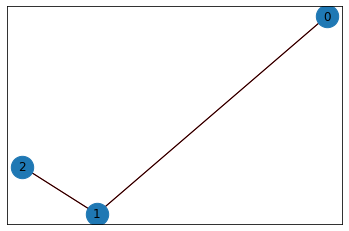


Rank:
{0: 0.3329293935665313, 1: 0.33393737037140553, 2: 0.33313323606206313}


In [38]:
G = nx.from_numpy_array(sim) # numpy array converting into G 
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='r', arrows=True)
nx.draw_networkx_edges(G, pos, arrows=False)
plt.show()

pr = nx.pagerank_numpy(G, alpha=0.3)
print("\nRank:")
print(pr)

# Formatted Function to get ranks of sentences

In [34]:
def sentencesRank(sentences, s):
  vectorizer = TfidfVectorizer()
  vectors = vectorizer.fit_transform(sentences)
  feature_names = vectorizer.get_feature_names()
  dense = vectors.todense()
  denselist = dense.tolist()
  df = pd.DataFrame(denselist, columns=feature_names)
  print("TF-IDF:")
  print(df)

  array = df.to_numpy()
  A_sparse = sparse.csr_matrix(array)
  cosineSimilaritiesSparse = cosine_similarity(A_sparse)
  cosineSimilarities = cosine_similarity(A_sparse,dense_output=False)
  print('Cosine Similary:\n {}\n'.format(cosineSimilarities))

  #replace 1 with 0
  sim = cosineSimilarities.toarray()
  sim[sim == 1] = 0

  print('Similariy Matrix:\n {}\n'.format(sim))

  # rank = pageRank(cosineSimilarities.toarray(),s)
  G = nx.from_numpy_array(sim)
  rank = nx.pagerank_numpy(G, alpha=s)

  G = nx.from_numpy_array(sim)
  pos = nx.spring_layout(G)
  nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 500)
  nx.draw_networkx_labels(G, pos)
  nx.draw_networkx_edges(G, pos, edge_color='r', arrows=True)
  nx.draw_networkx_edges(G, pos, arrows=False)
  plt.show()

  print("Page rank:")
  print(rank)
  return rank;

TF-IDF:
         118      2018      2020       33        70        95  accessible  \
0   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
1   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
2   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
3   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
4   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
5   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.238736   
6   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
7   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
8   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
9   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
10  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
11  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.0

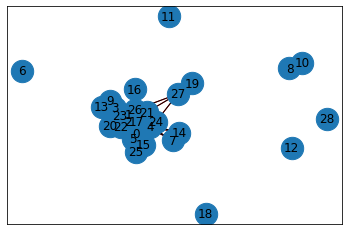

Page rank:
{0: 0.04957157817509813, 1: 0.05663215759968829, 2: 0.04520641782268471, 3: 0.03130720188631076, 4: 0.048725531974366874, 5: 0.03640007368193835, 6: 0.03802281368821269, 7: 0.034420032855130255, 8: 0.03802281368821281, 9: 0.02293014213223443, 10: 0.038022813688212836, 11: 0.0038022813688213014, 12: 0.03802281368821281, 13: 0.022930142132234328, 14: 0.03442003285513028, 15: 0.034390873976602745, 16: 0.0313572023866767, 17: 0.049922508331834016, 18: 0.0038022813688212997, 19: 0.016815038602074634, 20: 0.03665030805780523, 21: 0.022286388891287458, 22: 0.042168970467565604, 23: 0.057878834539404914, 24: 0.022527164394972845, 25: 0.02364799950668086, 26: 0.06597185850170531, 27: 0.05034144236925829, 28: 0.0038022813688212993}


Original Document:
According to Zameen Trends for buying apartments in Rawalpindi.
 Bahria Town has been the most sought-out place for buyers.
 If we look at the trends within Bahria.
 Bahria Town Phases 8.
 7 and 4 saw the most interest from buyers in No

In [35]:
doc = "According to Zameen Trends for buying apartments in Rawalpindi, Bahria Town has been the most sought-out place for buyers. If we look at the trends within Bahria, Bahria Town Phases 8, 7 and 4 saw the most interest from buyers in November. The society’s popularity is also due to its central location which is easily accessible from Islamabad Expressway, Faisal Avenue, and GT Road, including Phase 2, CBR Town, Phase 2, DHA, Soan Garden, Pakistan Town, and Gulistan Colony. According to Zameen.com’s data, the search volume for Bahria Town Rawalpindi apartments increased by 118% between 2018 and 2020; the highest rise observed among all property types in the society.. During this period, search volume for commercial units rose by 95%, while that for houses stood at 70%. With an increasing demand for apartments comes higher prospects for rental yield. Investing in an apartment at Bahria Town Rawalpindi guarantees solid rental yield, while the value of your property will continue to rise as well. Zameen.com’s data says that the average per square foot price of an apartment in Bahria Town Rawalpindi increased by 33% in the last three years, whereas prices of houses here remained mostly stable during this period."
doc = doc.replace(",",".")
sentences = doc.split(".")
s=0.9
rank = sentencesRank(sentences, s)

# threshold = rank.mean()
res = 0
for val in rank.values(): 
    res += val 
threshold = res/len(rank)
summary = ""

for i, key in enumerate(rank):
  if (rank[key] > threshold):
    summary = summary + str(sentences[i]) + ".\n"

fullstop = '.\n'
print("\n\nOriginal Document:\n" + fullstop.join(doc.split(".")))
print("\nSummary:\n" + summary)